In [62]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
%matplotlib inline

In [63]:
size=100
gamma = 0.95
X = sps.norm.rvs(size=100, loc=0, scale=1)

### Строим доверительные интервалы:
## (c) Для $a$ при неизвестном $\sigma^2$:
# $\left(\overline{X}-\sqrt{\frac{\overline S^2}{n-1}}z_{\frac{1+\gamma}{2}}, \overline{X}+\sqrt{\frac{\overline S^2}{n-1}}z_{\frac{1+\gamma}{2}} \right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня ${\frac{1+\gamma}{2}}$ из
# распределения Стьюдента $T_{n-1}$

In [70]:
quant = [sps.t.ppf((1+gamma)*1./2, i - 1) for i in range(2, size, 1)]

left = [X[:i].mean()-math.sqrt(((X[:i]**2).mean()+(X[:i].mean())**2)/(i-1))*quant[i-2] for i in range(2, size, 1)]
right = [X[:i].mean()+math.sqrt(((X[:i]**2).mean()+(X[:i].mean())**2)/(i-1))*quant[i-2] for i in range(2, size, 1)]

## Построим график:

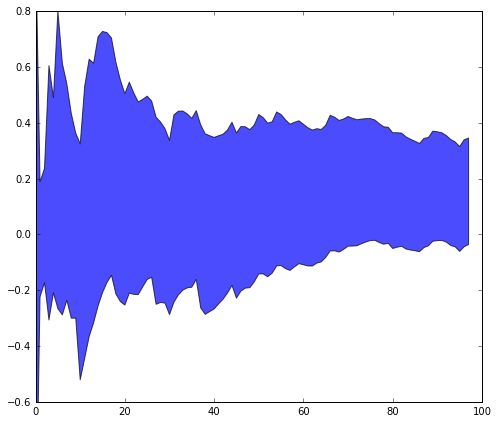

In [71]:
plt.figure(figsize=(8, 7))
plt.ylim(-0.6, 0.8)
plt.matplotlib.pyplot.fill_between(range(size-2), left, right, facecolor='blue', alpha = 0.7)

## (d) Для  $\sigma^2$ при неизвестном $a$ :
# $\left(\frac{(n-1)\overline S^2}{z_{\frac{1+\gamma}{2}}}, \frac{(n-1)\overline S^2}{z_{\frac{1-\gamma}{2}}}\right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня $\frac{1+\gamma}{2}$ из
# распределения $\chi^2_{n-1}$

In [89]:
quant_l = [sps.chi2.ppf((1+gamma)/2, i - 1) for i in range(2, size, 1)]
quant_r = [sps.chi2.ppf((1-gamma)/2, i - 1) for i in range(2, size, 1)]

left = [((X[:i]**2).mean()+(X[:i].mean())**2)*(i-1)/quant_l[i-2] for i in range(2, size, 1)]
right = [((X[:i]**2).mean()+(X[:i].mean())**2)*(i-1)/quant_r[i-2] for i in range(2, size, 1)]

## Построим график:

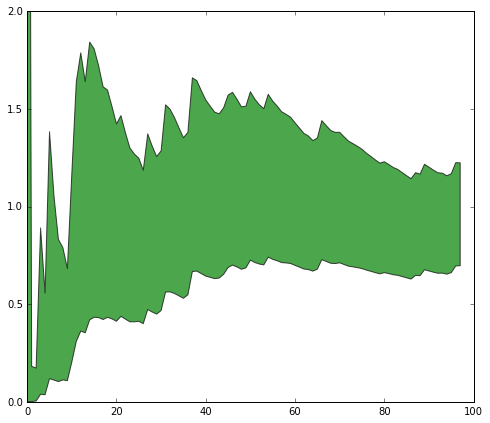

In [91]:
plt.figure(figsize=(8, 7))
plt.ylim(0, 2)
plt.matplotlib.pyplot.fill_between(range(size-2), left, right, facecolor='green', alpha = 0.7)

## (a) Для $a$ при известном $\sigma^2$ :
# $\left(\overline{X}-\frac{\sigma}{\sqrt{n}}z_{\frac{1+\gamma}{2}}, \overline{X}+\frac{\sigma}{\sqrt{n}}z_{\frac{1+\gamma}{2}} \right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня $\frac{1+\gamma}{2}$ из
# стандартного нормального распределения 

In [82]:
quant = sps.norm.ppf((1.+gamma)/2, loc=0, scale=1)
print(quant)

left = [X[:i].mean() - quant/math.sqrt(i) for i in range(1, size, 1)]
right = [X[:i].mean() + quant/math.sqrt(i) for i in range(1, size, 1)]

1.95996398454


## Построим график:

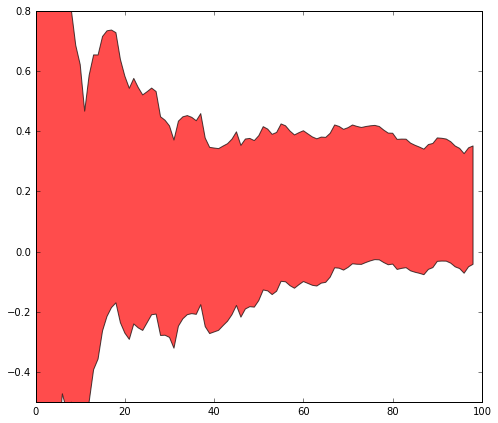

In [85]:
plt.figure(figsize=(8, 7))
plt.ylim(-0.5, 0.8)
plt.matplotlib.pyplot.fill_between(range(size-1), left, right, facecolor='red', alpha = 0.7)

## (b) Для  $\sigma^2$ при известном $a$ :
# $ \left(\frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{z_{\frac{1 + \gamma}{2}}} , \frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{z_{\frac{1 - \gamma}{2}}}\right) $, где  $z_{\frac{1 + \gamma}{2}}$, $z_{\frac{1 - \gamma}{2}}$ квантили уровней $\frac{1 + \gamma}{2}$, $\frac{1 - \gamma}{2}$ соответственно из распределения ${\chi^{2}_{n}}$

In [93]:
quant_l = [sps.chi2.ppf((1+gamma)/2, i) for i in range(1, size, 1)]
quant_r = [sps.chi2.ppf((1-gamma)/2, i) for i in range(1, size, 1)]

left = [sum(X[:i]**2)/quant_l[i-1] for i in range(1, size, 1)]
right = [sum(X[:i]**2)/quant_r[i-1] for i in range(1, size, 1)]

## Построим график

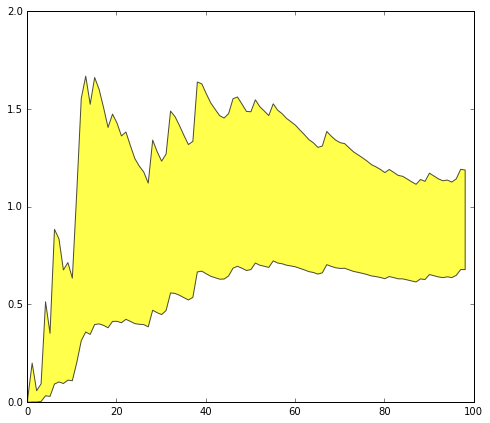

In [96]:
plt.figure(figsize=(8, 7))
plt.ylim(0, 2)
plt.matplotlib.pyplot.fill_between(range(size-1), left, right, facecolor='yellow', alpha=0.7)